# 4-Oscar Prediction with AutoML
After out dataframe has been assemlbed (see scraping and table_assembling) notebooks we have the data we need to make predictions on the Best Picture winner. [AutoML](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html) represents a quick, but powerful route though the Machine Learning process. H2O's AutoML runs many models through the dataset and using cross-validation, picks the best one. For my purposes I use it to confirm/compare to the Preferential Balloting Random Forest model I created.
If you are gunning to win your office's Oscar pool, scroll down to see the results.

In [15]:
import pandas as pd
import numpy as np
import h2o

In [16]:
full_table = pd.read_csv('../data/processed_results/extended_df.csv')
full_table=full_table.drop('Unnamed: 0', axis=1)
full_table.columns

Index(['year', 'film', 'wiki', 'winner', 'rating', 'numVotes',
       'worldwide_box_office', 'action', 'adventure', 'animation', 'biography',
       'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy',
       'film-noir', 'history', 'horror', 'music', 'musical', 'mystery',
       'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western',
       'nominations', 'Oscar_win', 'nom_gg_drama', 'winner_gg_drama',
       'nom_gg_comedy', 'winner_gg_comedy', 'nom_pga', 'winner_pga',
       'nom_bafta', 'winner_bafta', 'nom_dga', 'winner_dga', 'nom_sag',
       'winner_sag'],
      dtype='object')

# Machine Learning - Using h2o Auto ML

In [17]:
full_table = pd.read_csv('../data/processed_results/everything.csv')
full_table=full_table.drop('Unnamed: 0', axis=1)
full_table.columns

Index(['year', 'film', 'wiki', 'winner', 'rating', 'numVotes',
       'worldwide_box_office', 'action', 'adventure', 'animation', 'biography',
       'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy',
       'film-noir', 'history', 'horror', 'music', 'musical', 'mystery',
       'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western',
       'nominations', 'Oscar_win', 'nom_gg_drama', 'winner_gg_drama',
       'nom_gg_comedy', 'winner_gg_comedy', 'nom_pga', 'winner_pga',
       'nom_bafta', 'winner_bafta', 'nom_dga', 'winner_dga', 'nom_sag',
       'winner_sag', 'Acting', 'Production Design', 'Directing', 'VFX',
       'Writing', 'Cinematography', 'Sound', 'Film Editing', 'Music'],
      dtype='object')

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.241-b07, mixed mode)
  Starting server from C:\Users\Aleksandra Czaplak\AppData\Local\Programs\Python\Python39\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ALEKSA~1\AppData\Local\Temp\tmpwulvrab2
  JVM stdout: C:\Users\ALEKSA~1\AppData\Local\Temp\tmpwulvrab2\h2o_Aleksandra_Czaplak_started_from_python.out
  JVM stderr: C:\Users\ALEKSA~1\AppData\Local\Temp\tmpwulvrab2\h2o_Aleksandra_Czaplak_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_Aleksandra_Czaplak_4b3lbg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.761 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


First Year of Existance. This data will be used below
- golden_globes 1943
- pga 1989
- bafta 1960
- dga 1948
- sag 1995
- cannes 1970

In [19]:
# I pick a min_year where the awards shows will be relevant
min_year = 1995

# H2O's Auto ML

In [20]:
# Auto ML uses Cross Validation, so we do not specifiy a validation set
train = full_table.loc[((full_table['year'] < 2022) & (full_table['year'] >= min_year))]

print('training set contains:', train.shape[0], 'movies')

training set contains: 176 movies


In [21]:
#train = train.drop(['index', '[]'], axis=1)
train.columns

Index(['year', 'film', 'wiki', 'winner', 'rating', 'numVotes',
       'worldwide_box_office', 'action', 'adventure', 'animation', 'biography',
       'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy',
       'film-noir', 'history', 'horror', 'music', 'musical', 'mystery',
       'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western',
       'nominations', 'Oscar_win', 'nom_gg_drama', 'winner_gg_drama',
       'nom_gg_comedy', 'winner_gg_comedy', 'nom_pga', 'winner_pga',
       'nom_bafta', 'winner_bafta', 'nom_dga', 'winner_dga', 'nom_sag',
       'winner_sag', 'Acting', 'Production Design', 'Directing', 'VFX',
       'Writing', 'Cinematography', 'Sound', 'Film Editing', 'Music'],
      dtype='object')

In [6]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


model na df everything

In [15]:
from h2o.automl import H2OAutoML, get_leaderboard

# Import a sample binary outcome train/test set into H2O
train1 = h2o.H2OFrame(train)

# Identify predictors and response
predictors = ['year', 'rating', 'numVotes',
       'worldwide_box_office', 'action', 'adventure',
       'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'film-noir', 'history', 'horror', 'music',
       'musical', 'mystery', 'romance', 'sci-fi', 'sport', 'thriller', 'war',
       'western', 'nominations', 'nom_gg_drama',
       'winner_gg_drama', 'nom_gg_comedy', 'winner_gg_comedy', 'nom_pga',
       'winner_pga', 'nom_bafta', 'winner_bafta', 'nom_dga', 'winner_dga',
       'nom_sag', 'winner_sag','Acting',
       'Production Design', 'Directing', 'VFX', 'Writing', 'Cinematography',
       'Sound', 'Film Editing', 'Music']

x = predictors
y = 'Oscar_win'

# For binary classification, response should be a factor
train1[y] = train1[y].asfactor()

# Run AutoML for 100 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=100, seed=1
                , keep_cross_validation_predictions= True
               , exclude_algos = ['StackedEnsemble'])

aml.train(x=x, y=y, training_frame=train1)

# AutoML Leaderboard
lb = aml.leaderboard

# Optionally edd extra model information to the leaderboard
lb = get_leaderboard(aml, extra_columns='ALL')

# Print all rows (instead of default 10 rows)
lb.head(rows=lb.nrows)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
08:57:22.228: AutoML: XGBoost is not available; skipping it.
08:57:22.458: _train param, Dropping bad and constant columns: [nom_cannes, winner_cannes, film-noir, documentary]

█
08:57:24.737: _train param, Dropping bad and constant columns: [nom_cannes, winner_cannes, film-noir, documentary]
08:57:24.738: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 176.0.
08:57:24.764: _train param, Dropping bad and constant columns: [nom_cannes, winner_cannes, film-noir, documentary]

██
08:57:26.950: _train param, Dropping bad and constant columns: [nom_cannes, winner_cannes, film-noir, documentary]

██
08:57:28.249: _train param, Dropping bad and constant columns: [nom_cannes, winner_cannes, film-noir, documentary]
08:57:29.742: _train param, Dropping bad and constant columns: [nom_cannes, winner_can

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_grid_2_AutoML_1_20230524_85722_model_5,0.830513,0.695563,0.448287,0.248974,0.372326,0.138627,2709,0.710977,DeepLearning
DeepLearning_grid_3_AutoML_1_20230524_85722_model_2,0.823077,0.417719,0.39347,0.233077,0.344425,0.118629,2689,0.760255,DeepLearning
DeepLearning_grid_2_AutoML_1_20230524_85722_model_22,0.817179,0.464433,0.513033,0.251538,0.321971,0.103665,2708,0.164375,DeepLearning
DeepLearning_grid_3_AutoML_1_20230524_85722_model_5,0.813077,0.654276,0.381339,0.299231,0.38311,0.146773,2062,0.109675,DeepLearning
DeepLearning_grid_2_AutoML_1_20230524_85722_model_14,0.809487,0.53134,0.396423,0.23641,0.361284,0.130526,3939,0.177956,DeepLearning
DeepLearning_grid_1_AutoML_1_20230524_85722_model_10,0.808846,0.738022,0.378064,0.258205,0.373639,0.139606,3034,0.908088,DeepLearning
DeepLearning_grid_2_AutoML_1_20230524_85722_model_4,0.802821,0.671927,0.381739,0.212821,0.402897,0.162326,4143,0.270085,DeepLearning
DeepLearning_grid_2_AutoML_1_20230524_85722_model_3,0.797692,0.597201,0.321101,0.254615,0.400425,0.16034,2784,0.086429,DeepLearning
DeepLearning_grid_1_AutoML_1_20230524_85722_model_16,0.795128,1.49879,0.359095,0.273077,0.414024,0.171416,2630,0.117531,DeepLearning
DeepLearning_grid_1_AutoML_1_20230524_85722_model_2,0.793077,0.73027,0.377618,0.285641,0.404787,0.163852,2700,0.14276,DeepLearning


In [16]:
top_model = aml.leader
top_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_1_20230524_85722_model_5


Status of Neuron Layers: predicting Oscar_win, 2-class classification, bernoulli distribution, CrossEntropy loss, 15 002 weights/biases, 187,0 KB, 61 600 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight           weight_rms           mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  --------------------  ----------  --------------------  -------------------  --------------------  --------------------
    1        46       Input             10.0
    2        100      RectifierDropout  40.0       0.0   0.0   0.024001602752263273  0.033011242747306824  0.0         0.008695049894723406  0.14952033758163452  0.36261498813666504   0.0869915783405304
    3        100      RectifierDropout  40.0       0.0   0.0   0.0412027502400917    0.11048451066017151   0.0         -0.02315176722473684  0.11381083726882935  0.8343523728225254    0.09808292984962463
    4        2        Softmax                      0.0   0.0   0.011748650879599153  0.009497851133346558  0.0         -0.04135797238530358  0.5311203002929688   0.004755425862202034  0.005320673808455467

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 1.811046872184211e-05
RMSE: 0.0042556396372157865
LogLoss: 0.0007151719579600746
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9929139937321374
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      150  0    0        (0.0/150.0)
1      0    26   0        (0.0/26.0)
Total  150  26   0        (0.0/176.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.992914     1         25
max f2                       0.992914     1         25
max f0point5                 0.992914     1         25
max accuracy                 0.992914     1         25
max precision                1            1         0
max recall                   0.992914     1         25
max specificity              1            1         0
max absolute_mcc             0.992914     1         25
max min_per_class_accuracy   0.992914     1         25
max mean_per_class_accuracy  0.992914     1         25
max tns                      1            150       0
max fns                      1            25        0
max fps                      4.66436e-18  150       175
max tps                      0.992914     26        25
max tnr                      1            1         0
max fnr                      1            0.961538  0
max fpr                      4.66436e-18  1         175
max tpr                      0.992914     1         25

Gains/Lift Table: Avg response rate: 14,77 %, avg score: 14,82 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0113636                   0.999998           6.76923  6.76923            1                0.999999     1                           0.999999            0.0769231       0.0769231                  576.923  576.923            0.0769231
2        0.0227273                   0.999995           6.76923  6.76923            1                0.999997     1                           0.999998            0.0769231      

model jest na wszystkich danych

In [29]:
# Get the leaderboard
leaderboard = aml.leaderboard

# Get the model ID of the third model (assuming zero-based indexing)
third_model_id = leaderboard[2, 'model_id']

# Retrieve the model from the third position using the model ID
third_model = h2o.get_model(third_model_id)


In [30]:
third_model

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_2_AutoML_1_20230524_85722_model_22


Status of Neuron Layers: predicting Oscar_win, 2-class classification, bernoulli distribution, CrossEntropy loss, 5 002 weights/biases, 68,6 KB, 103 840 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate             rate_rms             momentum    mean_weight            weight_rms           mean_bias              bias_rms
--  -------  -------  ----------------  ---------  ----  ----  --------------------  -------------------  ----------  ---------------------  -------------------  ---------------------  -------------------
    1        46       Input             15.0
    2        50       RectifierDropout  30.0       0.0   0.0   0.038892969792017854  0.10349225997924805  0.0         0.009932569338811648   0.19275730848312378  0.41522828157936453    0.13296157121658325
    3        50       RectifierDropout  30.0       0.0   0.0   0.035638015663798435  0.11583846807479858  0.0         -0.013097085671580862  0.15860271453857422  0.8645436029005091     0.12200167775154114
    4        2        Softmax                      0.0   0.0   0.018841800816589968  0.09684017300605774  0.0         0.02686685076914728    0.7908759117126465   -0.013836189397350096  0.38205671310424805

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0002918639572209168
RMSE: 0.01708402637614789
LogLoss: 0.00258135695067732
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9935320906464516
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      150  0    0        (0.0/150.0)
1      0    26   0        (0.0/26.0)
Total  150  26   0        (0.0/176.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.993532     1         25
max f2                       0.993532     1         25
max f0point5                 0.993532     1         25
max accuracy                 0.993532     1         25
max precision                1            1         0
max recall                   0.993532     1         25
max specificity              1            1         0
max absolute_mcc             0.993532     1         25
max min_per_class_accuracy   0.993532     1         25
max mean_per_class_accuracy  0.993532     1         25
max tns                      1            150       0
max fns                      1            25        0
max fps                      4.70512e-32  150       175
max tps                      0.993532     26        25
max tnr                      1            1         0
max fnr                      1            0.961538  0
max fpr                      4.70512e-32  1         175
max tpr                      0.993532     1         25

Gains/Lift Table: Avg response rate: 14,77 %, avg score: 14,99 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0113636                   1                  6.76923  6.76923            1                1            1                           1                   0.0769231       0.0769231                  576.923  576.923            0.0769231
2        0.0227273                   0.999999           6.76923  6.76923            1                0.999999     1                           0.999999            0.0769231      

In [22]:
# Załadowanie danych do ramki danych H2O
data = h2o.import_file("../data/processed_results/extended_df.csv")

data = data.drop(['film', 'wiki', 'year', 'winner'], axis=1)
# # Sprawdzenie typów kolumn
# column_types = data.types

# # Wyświetlenie kolumn typu string
# string_columns = [column for column, col_type in column_types.items() if col_type == 'string']
# print(string_columns)

# Obliczenie macierzy korelacji
correlations = data.cor(na_rm=True)

# Wyświetlenie macierzy korelacji
print(correlations)

# Wydrukowanie korelacji powyżej progu 0.8
threshold = 0.8
for row in range(correlations.shape[0]):
    for col in range(row + 1, correlations.shape[1]):
        correlation = correlations[row, col]
        if abs(correlation) > threshold:
            print(f"Korelacja między zmienną {data.col_names[row]} a {data.col_names[col]}: {correlation}")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
        C10     rating0    numVotes0    worldwide_box_office0      action0    adventure0    animation0    biography0      comedy0       crime0    documentary0      drama0      family0    fantasy0    film-noir0    history0      horror0      music0     musical0     mystery0      romance0      sci-fi0       sport0    thriller0          war0     western0    nominations0    Oscar_win0    nom_gg_drama0    winner_gg_drama0    nom_gg_comedy0    winner_gg_comedy0    nom_pga0    winner_pga0    nom_bafta0    winner_bafta0    nom_dga0    winner_dga0    nom_sag0    winner_sag0
 1            0.314227    0.386407                 0.209462    -0.0251696     -0.0152674   -0.00567338    0.139222    -0.0820067   -0.0922513      -0.0903216    0.0475568  -0.0425951   -0.0170899   -0.110394     0.0253929  -0.0681248   -0.0102693  -0.0967491   -0.0351218   -0.196358      0.108229    -0.0254172   -0.0359547   -0.0360

In [23]:
data

C1,rating,numVotes,worldwide_box_office,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western,nominations,Oscar_win,nom_gg_drama,winner_gg_drama,nom_gg_comedy,winner_gg_comedy,nom_pga,winner_pga,nom_bafta,winner_bafta,nom_dga,winner_dga,nom_sag,winner_sag
0,7.3,13576,746,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,7,1,0,0,0,0,0,0,0,0,0,0,0,0
1,5.2,26223,79808,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.7,3149,2.17332e+07,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.6,7605,223723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,7.4,391,42915,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5.5,1199,6344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7.2,282275,2.15294e+08,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
9,6.8,4322,1.73959e+08,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
10,6.1,1318,1.30259e+07,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0
11,6.7,3366,6253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0


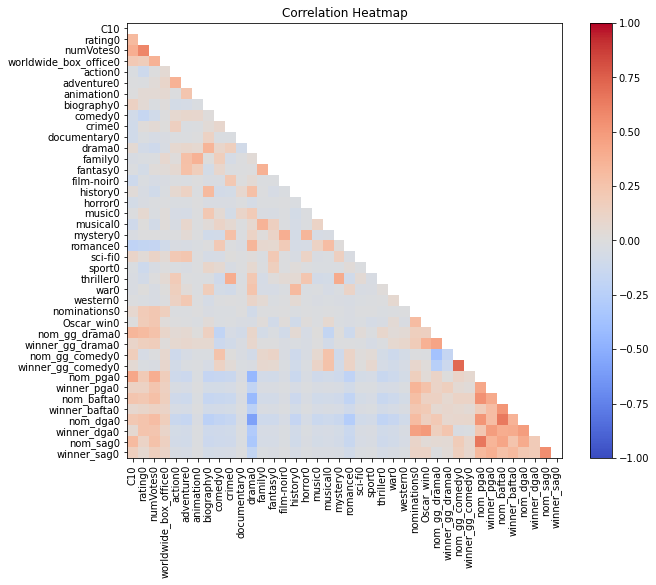

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the correlation matrix stored in a variable called 'correlation_matrix'

# Convert the correlation matrix to a numeric format
correlation_matrix = correlations.as_data_frame().values.astype(float)
column_names=correlations.columns

# Create a masked array from the correlation matrix to hide the upper triangle
masked_corr = np.ma.masked_where(np.triu(np.ones_like(correlation_matrix, dtype=bool)), correlation_matrix)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
heatmap = ax.imshow(masked_corr, cmap='coolwarm', vmin=-1, vmax=1)

# Add a colorbar
cbar = fig.colorbar(heatmap)

# Set the axis labels
ax.set_xticks(np.arange(correlation_matrix.shape[1]))
ax.set_yticks(np.arange(correlation_matrix.shape[0]))
ax.set_xticklabels(column_names, rotation=90)
ax.set_yticklabels(column_names)

# Set the title
ax.set_title("Correlation Heatmap")

# Show the plot
plt.show()


In [ ]:
model = h2o.load_model('./additional_data/model/DeepLearning_grid_2_AutoML_6_20230519_91906_model_4')

## Predict the winner

In [13]:
# Predict on 2019's films
test = full_table.loc[(full_table['year'] == 2021)]

# Import a binary outcome train/test set into H2O
test = h2o.H2OFrame(test)

# For binary classification, response should be a factor
test[y] = test[y].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [14]:
preds = top_model.predict(test)

preds

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.999976,2.37118e-05
1,0.00165605,0.998344
0,0.995174,0.00482619
0,1,1.74511e-07
0,0.995249,0.00475117
0,0.999972,2.78123e-05
0,0.999979,2.0885e-05
0,1,9.07248e-09
0,0.999955,4.5392e-05
0,0.999999,1.10776e-06


In [15]:
test['pred'] = preds['predict']
test['probA'] = preds['p1']
test_pd = test.as_data_frame(use_pandas=True)

In [16]:
final_rankings = test_pd[['film','probA']].sort_values('probA', ascending = False)
final_rankings['%_confidence'] = final_rankings['probA']/final_rankings['probA'].sum() * 100
final_rankings

,film,probA,%_confidence
1,CODA,9.983440e-01,9.903809e+01
2,Belfast,4.826187e-03,4.787692e-01
4,Drive My Car,4.751175e-03,4.713278e-01
8,Nightmare Alley,4.539204e-05,4.502998e-03
5,Dune,2.781235e-05,2.759051e-03
0,West Side Story,2.371181e-05,2.352268e-03
6,King Richard,2.088495e-05,2.071837e-03
9,The Power of the Dog,1.107759e-06,1.098923e-04
3,Don't Look Up,1.745112e-07,1.731192e-05
7,Licorice Pizza,9.072485e-09,9.000120e-07


# And the Oscar goes to...

In [ ]:
bp_winner = np.array(final_rankings.reset_index())[0][1].split('(')[0].strip()
print(f'And the Oscar goes to...\n🎉🏆{bp_winner}🏆🎉')